# NYUAD 2025 Lightning Azure on qBraid Demo

In [1]:
%pip install qbraid[azure]==0.9.6.dev20250425155658 qbraid-qir pasqal-cloud pulser-core pulser-simulation qiskit cirq --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

import cirq
import pulser
from pulser.waveforms import RampWaveform, BlackmanWaveform
from qbraid import ConversionGraph, QbraidProvider, QPROGRAM_REGISTRY, random_circuit, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

## Code in cirq, qiskit, and other frameworks to submit jobs on qBraid

The graph below shows how qBraid is compatible with various frameworks to transpile and submit jobs to 26+ devices.

In [3]:
QPROGRAM_REGISTRY

{'cirq': cirq.circuits.circuit.Circuit,
 'qiskit': qiskit.circuit.quantumcircuit.QuantumCircuit,
 'openqasm3': openqasm3.ast.Program,
 'qasm2': str,
 'qasm2_kirin': str,
 'qasm3': str,
 'qubo': qbraid.programs.typer.QuboCoefficientsDict,
 'ionq': qbraid.programs.typer.IonQDict,
 'pyqir': Module,
 'pulser': pulser.sequence.sequence.Sequence}

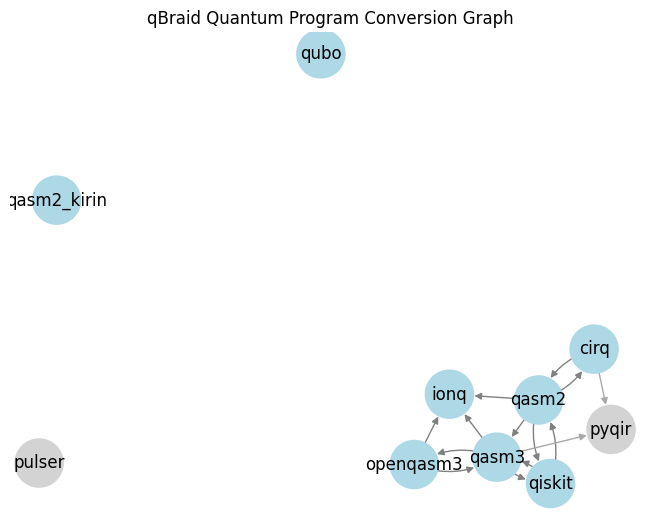

In [4]:
graph = ConversionGraph()
graph.plot()

## Submitting to various quantum simulators for the hackathon
In the following demonstration we will show how to submit jobs for various quantum devices available to you.

### Random Qiskit circuit

In [5]:
circuit = random_circuit('qiskit', num_qubits=2, depth=4)

c = ClassicalRegister(2)
circuit.add_register(c)

circuit.measure(circuit.qubits, c)
circuit.draw()

┌─────────────────────────┐    ┌───┐     ┌─────────────────────────┐»
 q_0: ┤0                        ├────┤ T ├─────┤1                        ├»
      │  (XX-YY)(2.8068,4.2369) │┌───┴───┴────┐│  (XX+YY)(1.3971,3.3094) │»
 q_1: ┤1                        ├┤ Rx(2.7385) ├┤0                        ├»
      └─────────────────────────┘└────────────┘└─────────────────────────┘»
c0: 2/════════════════════════════════════════════════════════════════════»
                                                                          »
«                ┌─────┐          ┌─┐   
« q_0: ──────────┤ Tdg ├──────────┤M├───
«      ┌─────────┴─────┴─────────┐└╥┘┌─┐
« q_1: ┤ U3(2.4963,4.095,4.5435) ├─╫─┤M├
«      └─────────────────────────┘ ║ └╥┘
«c0: 2/════════════════════════════╩══╩═
«                                  0  1

### QIR

In [6]:
cirq_circuit = random_circuit('cirq', num_qubits=2, depth=4)
cirq_circuit.append(cirq.measure(cirq_circuit.all_qubits()))
print(cirq_circuit)

0: ───Y───T───Y───×───M───
                  │   │
1: ───────────────×───M───


In [7]:
# Transpile to QIR
qir_module = transpile(cirq_circuit,'pyqir')
print(qir_module)

; ModuleID = 'circuit-6787a89'
source_filename = "circuit-6787a89"

%Qubit = type opaque
%Result = type opaque

define void @main() #0 {
entry:
  call void @__quantum__rt__initialize(i8* null)
  call void @__quantum__qis__y__body(%Qubit* inttoptr (i64 1 to %Qubit*))
  call void @__quantum__qis__t__body(%Qubit* inttoptr (i64 1 to %Qubit*))
  call void @__quantum__qis__y__body(%Qubit* inttoptr (i64 1 to %Qubit*))
  call void @__quantum__qis__swap__body(%Qubit* inttoptr (i64 1 to %Qubit*), %Qubit* null)
  call void @__quantum__qis__mz__body(%Qubit* null, %Result* null)
  call void @__quantum__qis__mz__body(%Qubit* inttoptr (i64 1 to %Qubit*), %Result* inttoptr (i64 1 to %Result*))
  call void @__quantum__rt__result_record_output(%Result* null, i8* null)
  call void @__quantum__rt__result_record_output(%Result* inttoptr (i64 1 to %Result*), i8* null)
  ret void
}

declare void @__quantum__rt__initialize(i8*)

declare void @__quantum__qis__y__body(%Qubit*)

declare void @__quantum__qis__t__

### Pulser Sequence

In [8]:
input_data = {}
	
qubits = {
    "q0": (0, 0),
    "q1": (0, 10),
    "q2": (8, 2),
    "q3": (1, 15),
    "q4": (-10, -3),
    "q5": (-8, 5),
}
reg = pulser.Register(qubits)

seq = pulser.Sequence(reg, pulser.devices.DigitalAnalogDevice)

# print the available channels for your sequence
print(seq.available_channels)

# Declare a channel. In this example we will be using `rydberg_global`
seq.declare_channel("ch0", "rydberg_global")

amp_wf = BlackmanWaveform(1000, np.pi)
det_wf = RampWaveform(1000, -5, 5)
pulse = pulser.Pulse(amp_wf, det_wf, 0)
seq.add(pulse, "ch0")

{'rydberg_global': Rydberg(addressing='Global', max_abs_detuning=125.66370614359172, max_amp=15.707963267948966, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=67108864, min_avg_amp=0, mod_bandwidth=None, custom_phase_jump_time=None, eom_config=None, propagation_dir=None), 'rydberg_local': Rydberg(addressing='Local', max_abs_detuning=125.66370614359172, max_amp=62.83185307179586, min_retarget_interval=220, fixed_retarget_t=0, max_targets=1, clock_period=4, min_duration=16, max_duration=67108864, min_avg_amp=0, mod_bandwidth=None, custom_phase_jump_time=None, eom_config=None, propagation_dir=None), 'raman_local': Raman(addressing='Local', max_abs_detuning=125.66370614359172, max_amp=62.83185307179586, min_retarget_interval=220, fixed_retarget_t=0, max_targets=1, clock_period=4, min_duration=16, max_duration=67108864, min_avg_amp=0, mod_bandwidth=None, custom_phase_jump_time=None, eom_config=None, propagation_dir=None), 

## Your available devices
Get your API key from the qBraid dashboard and set it up in your environment. You can do this by passing the API key into the [QbraidProvider class](https://docs.qbraid.com/sdk/user-guide/providers/native). You can also set the API key using the qBraid CLI. 


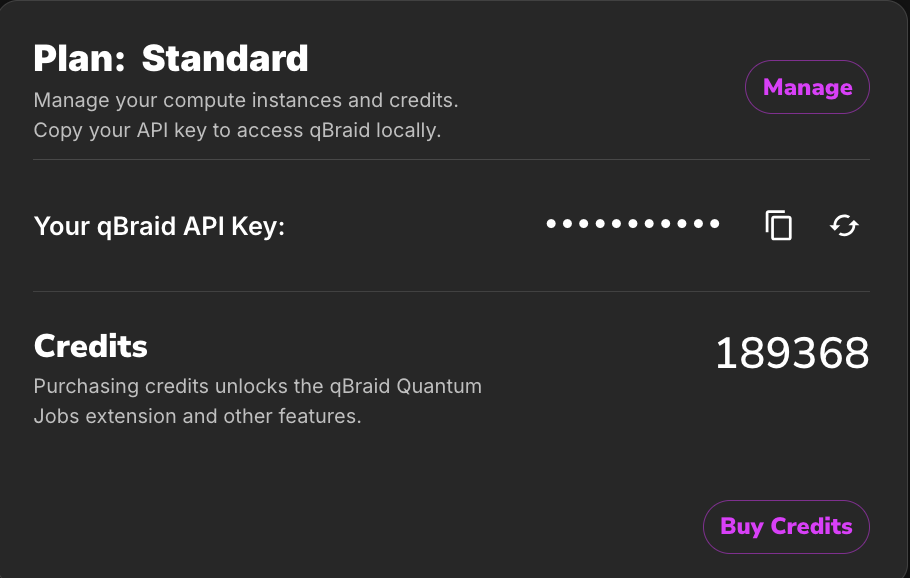


View the available devices to you below:

In [10]:
provider = QbraidProvider(api_key='h6v0kiclz3a')
provider.save_config()

In [11]:
provider.get_devices(vendor="Azure")

[<qbraid.runtime.native.device.QbraidDevice('quantinuum.sim.h1-1e')>,
 <qbraid.runtime.native.device.QbraidDevice('quantinuum.sim.h1-1sc')>,
 <qbraid.runtime.native.device.QbraidDevice('rigetti.sim.qvm')>,
 <qbraid.runtime.native.device.QbraidDevice('pasqal.sim.emu-tn')>,
 <qbraid.runtime.native.device.QbraidDevice('ionq.simulator')>]

## Quantinuum

### Quantinuum H1-1 Syntax Checker

The syntax checkers are provided to check program syntax and are specific to each Quantinuum device. Before submitting quantum circuits to the Quantinuum hardware or emulators, use of a syntax checker is highly recommended. Jobs submitted to the Quantinuum hardware are in QIR (Quantum Intermediate Representation) format. The syntax checker enables checking of the code to ensure it will run before being submitted to the hardware or emulators on qBraid in qasm2. Access to a syntax checker corresponds to the machines available in a user’s subscription.

If the code compiles, the syntax checker will return a completed status, the cost of the circuit in Hardware Quantum Credits (HQCs), and results of all (0, 0, ..., 0). Submission to the syntax checker does not incur a HQC cost.

Reference: https://docs.quantinuum.com/systems/user_guide/hardware_user_guide/access

In [12]:
quantinuum_syntax_checker = provider.get_device('quantinuum.sim.h1-1sc')
quantinuum_syntax_checker.metadata()

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:
job = quantinuum_syntax_checker.run(circuit,shots=100)

In [13]:
job.status()

NameError: name 'job' is not defined

In [ ]:
job.wait_for_final_state()

In [14]:
result = job.result()
result

NameError: name 'job' is not defined

In [ ]:
result.data.get_counts()

### Quantinuum H1-1 Emulator

To support quantum algorithm development and design, emulators are available that model each machine’s specific ion transport and error rates. The emulators operate on a physical model as well as include a detailed error model of each Quantinuum quantum computer. In addition, options are provided to the user to experiment with the noise parameters of the emulator. The emulator user guide provides more information on operation and noise model capability.

Reference: https://docs.quantinuum.com/systems/user_guide/hardware_user_guide/access

In [ ]:
quantinuum_emulator = provider.get_device('quantinuum.sim.h1-1e')
quantinuum_emulator.metadata()

In [ ]:
# NOTE: This requires qBraid credits
# If the syntax checker ran the random circuit, we can run on the emulator.
job = quantinuum_emulator.run(circuit,shots=1)

In [ ]:
job.status()

In [ ]:
job.wait_for_final_state()

In [ ]:
result = job.result()
result

In [ ]:
result.data.get_counts()

### Rigetti QVM Simulator
The Quantum Virtual Machine (QVM) is an open-source simulator for Quil. The rigetti.sim.qvm target accepts a Quil program as text and runs that program on QVM hosted in the cloud, returning simulated results. On qBraid, we accept QIR as the input type. Check your conversion graph to make sure your framework can be transpiled to QIR.


Reference: https://learn.microsoft.com/en-us/azure/quantum/provider-rigetti?tabs=tabid-pyquil

In [15]:
rigetti_sim_qvm = provider.get_device('rigetti.sim.qvm')
rigetti_sim_qvm.metadata()

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [67]:
# Specify the QIR Entrypoint

job = rigetti_sim_qvm.run(qir_module,shots=1,entrypoint="main")

In [68]:
job.status()

<INITIALIZING: 'job is being initialized'>

In [69]:
job.wait_for_final_state()

In [70]:
result = job.result()
result

Result(
  device_id=rigetti.sim.qvm,
  job_id=rigetti.sim.qvm-rickyyoung-qjob-84fqyskhvpzdloxxm33d,
  success=True,
  data=GateModelResultData(measurement_counts={'11': 1}, measurements=array(shape=(0,), dtype=object)),
  status='COMPLETED',
  statusText='job has successfully run',
  shots=1,
  experimentType=GATE_MODEL,
  queuePosition=None,
  timeStamps={createdAt: 2025-04-25T21:56:57Z, endedAt: 2025-04-25T21:57:05Z, executionDuration: 1084},
  tags={errorMitigationDebias: False},
  cost=Credits('0'),
  preflight=False,
  schemaHeader={name: 'qbraid.runtime.schemas.job', version: 1.0},
  metadata={openQasm: None, circuitNumQubits: None, circuitDepth: None}
)

In [71]:
result.data.get_counts()

{'11': 1}

## IonQ

### IonQ Simulator
This GPU-accelerated idealized simulator supports up to 29 qubits, using the same set of gates IonQ provide on its quantum hardware—a great place to preflight jobs before running them on an actual quantum computer. The simulator is free and runs on the IonQ JSON circuit input.

Reference: https://learn.microsoft.com/en-us/azure/quantum/provider-ionq

In [18]:
ionq_simulator = provider.get_device('ionq.simulator')

In [19]:
job = ionq_simulator.run(circuit,shots=1000,noise_model="aria-1", error_mitigation={"debias": False},seed=5)

/opt/.qbraid/environments/qbraid_000000/pyenv/lib/python3.11/site-packages/qbraid/transpiler/conversions/openqasm3/openqasm3_to_ionq.py:407: UserWarning: Circuit contains measurement gates, which will be ignored during conversion to the IonQDictType
  warnings.warn(


In [20]:
job.status()

<INITIALIZING: 'job is being initialized'>

In [ ]:
job.wait_for_final_state()

In [ ]:
result = job.result()
result

In [ ]:
result.data.get_counts()

## Pasqal

### Pasqal Emulator
PASQAL's Emu-TN emulator simulates the time-evolution of a quantum state using the Schrödinger's equation corresponding to the actions that the lasers perform.
Emu-TN emulator runs on a cluster of DGX nodes, each equipped with NVIDIA A100 GPUs, enabling the emulation of PASQAL’s quantum processors. It's a key tool to prototype and validate quantum programs before running them on the QPU . Up to 100 qubits in 2D arrays can be emulated to develop industrial applications and to advance scientific discovery.

Reference: https://learn.microsoft.com/en-us/azure/quantum/provider-pasqal

In [109]:
pasqal_emulator = provider.get_device('pasqal.sim.emu-tn')
pasqal_emulator.profile

TargetProfile(device_id='pasqal.sim.emu-tn', simulator=True, experiment_type=<ExperimentType.AHS: 'ahs'>, num_qubits=100, program_spec=<ProgramSpec('pulser.sequence.sequence.Sequence', 'pulser')>, provider_name='Pasqal', basis_gates=None, noise_models=None, name='Emulator (Azure)', pricing=DevicePricing(perTask=USD('0'), perShot=USD('0'), perMinute=USD('0.25')))

In [122]:
# NOTE: This requires qBraid credits
job = pasqal_emulator.run(seq,shots=1)

In [123]:
job.status()

<INITIALIZING: 'job is being initialized'>

In [124]:
job.wait_for_final_state()

In [125]:
result = job.result()
result

Result(
  device_id=pasqal.sim.emu-tn,
  job_id=pasqal.sim.emu-tn-rickyyoung-qjob-3kgcjvh0uipqqdvxg8qk,
  success=True,
  data=AhsResultData(measurement_counts={'000110': 1}, measurements=[]),
  status='COMPLETED',
  statusText='job has successfully run',
  shots=1,
  experimentType=AHS,
  queuePosition=None,
  timeStamps={createdAt: 2025-04-25T22:22:01Z, endedAt: 2025-04-25T22:25:58Z, executionDuration: 218000},
  tags={errorMitigationDebias: False},
  cost=Credits('0.915'),
  preflight=False,
  schemaHeader={name: 'qbraid.runtime.schemas.job', version: 1.0},
  metadata={numAtoms: None, sites: [], filling: []}
)

In [126]:
result.data.get_counts()

{'000110': 1}